In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

In [2]:
#Performing KNN by loading dataset

dataset = pd.read_csv('preventive_maintenance.csv')

In [3]:
#explore the dataset to view first 5 rows 5 last rows

dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
dataset.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
#Exploring information about the dataset to understand it,understand the shape (10000 X 4) and identifying my class 
#from this information, i didn't need to check for missing variable as i can see there isn't any.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
#I displayed just the columns i needed for this analysis haven explored the dataset in initial steps reducing the columns to 12

dataset = dataset.iloc[:, 3:]
dataset

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
#Getting Value count for class

dataset['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [8]:
dataset.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
# select the independent variables X and dependent variable y

X =dataset.iloc[:,[0,1,2,3,4,6,7,8,9,10]]
y = dataset['Machine failure']

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

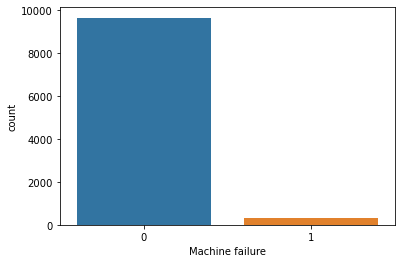

In [10]:
#utilising seaborn to view class label distribution to determin if class balancing is required

sns.countplot(y)

In [11]:
#From the plot, it's clear balancing is required. Splitting the dataset into testset and training set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
imb = RandomOverSampler(random_state=100)

X_train_sampled, y_train_sampled = imb.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

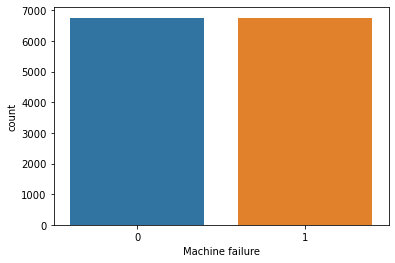

In [13]:
#displaying the balanced variable 
sns.countplot(y_train_sampled)

In [14]:
#Training the model
#Fitting the KNN into the training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_sampled, y_train_sampled)

KNeighborsClassifier()

In [15]:
#now the data is trained, it's time to evaluate the model
#predicting the dataset

y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [16]:
print(y_test)

8018    0
9225    0
3854    1
2029    0
3539    0
       ..
4208    0
5335    0
2554    0
13      0
4468    0
Name: Machine failure, Length: 3000, dtype: int64


In [17]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('--------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.93


Confusion Matrix:
[[2748  150]
 [  50   52]] 


--------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2898
           1       0.26      0.51      0.34       102

    accuracy                           0.93      3000
   macro avg       0.62      0.73      0.65      3000
weighted avg       0.96      0.93      0.94      3000



<function matplotlib.pyplot.show(close=None, block=None)>

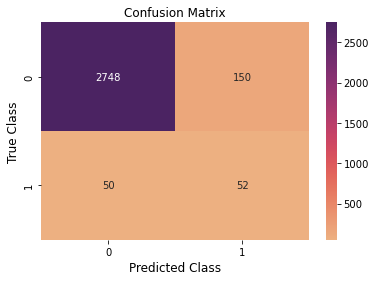

In [18]:
#utilizing seaborn heatmap to visualize the confusion matrix

ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)

plt.show